### Bank Loan Analysis

#### Variables

Target variable:<BR>
    Loan Status<BR><BR>
Independent variable:<BR>
1   Loan ID<BR>
2   Customer ID<BR>
3   Current Loan Amount<BR>
4   Term<BR>
5   Credit Score<BR>
6   Annual Income<BR>
7   Years in current job<BR> 
8   Home Ownership<BR>
9   Purpose<BR>
10  Monthly Debt<BR>
11  Years of Credit History<BR>
12  Months since last delinquent<BR>
13  Number of Open Accounts<BR>
14  Number of Credit Problems<BR>
15  Current Credit Balance<BR>
16  Maximum Open Credit<BR>
17  Bankruptcies<BR>
18  Tax Liens

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format',lambda x: '%.2f' % x)

%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('bone')

In [2]:
data = pd.read_csv('Kaggle_credit.csv')
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,NaN,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,NaN,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


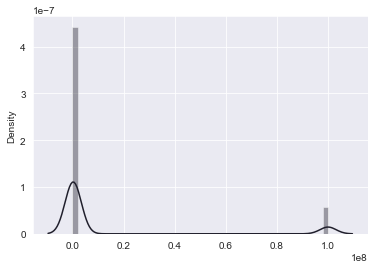

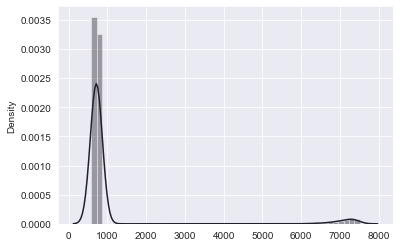

In [6]:
sns.distplot(x = df['Current Loan Amount'])
plt.show()
sns.distplot(x = df['Credit Score'])
plt.show()

In [7]:
print(sum(df['Current Loan Amount'] == 99999999))
print(sum(df['Credit Score'] > 1000))

11484
4551


[Current Loan Amount]及[Credit Score]有資料誤植的情形。

#### Remove Missing Values, Duplicates and Typing Errors

In [8]:
print(df.isnull().sum()[df.isnull().sum()>0])
print('\n')
print('Duplicate Data:', df.duplicated().sum())

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


Duplicate Data: 10728


In [9]:
df.dropna(axis=0, how='all', inplace=True)
df.drop_duplicates(inplace=True)
print(df.isnull().sum()[df.isnull().sum()>0])
print('\n')
print('Duplicate Data:', df.duplicated().sum())

Credit Score                    19154
Annual Income                   19154
Years in current job             3802
Months since last delinquent    48337
Maximum Open Credit                 2
Bankruptcies                      190
Tax Liens                           9
dtype: int64


Duplicate Data: 0


##### Duplicates

In [10]:
df[df['Loan ID'].duplicated()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.00,Long Term,689.00,866799.00,9 years,Home Mortgage,Debt Consolidation,3676.69,14.10,7.00,4.00,2.00,86051.00,167750.00,2.00,0.00
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,717.00,1765290.00,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,NaN,16.00,1.00,446329.00,891022.00,1.00,0.00
2020,4ada45a7-1323-4961-a8b4-45bf1c473bab,117496d1-3c6e-4299-a8f6-0e4668b6bef9,Fully Paid,301114.00,Long Term,NaN,NaN,< 1 year,Rent,Debt Consolidation,5948.71,9.00,NaN,10.00,1.00,59888.00,372746.00,1.00,0.00
2268,35e2f286-1c14-4892-8ddf-cd9c397f84a4,75b6f4dd-b3c6-4220-969f-54c372c22e1f,Fully Paid,65714.00,Short Term,721.00,662074.00,4 years,Rent,Other,1704.87,14.90,50.00,3.00,0.00,33250.00,120340.00,0.00,0.00
2680,3b990bb6-440c-43ee-9ef1-4e303b5447dd,8ce9f4e4-0044-4779-a4c5-66552927d0ab,Fully Paid,270556.00,Short Term,NaN,NaN,10+ years,Own Home,Home Improvements,24095.61,23.50,70.00,7.00,0.00,286387.00,908490.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,Fully Paid,431860.00,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.50,25.00,5.00,0.00,241319.00,476806.00,0.00,0.00
99979,2e7e2e3b-db0b-418d-aae8-33991bb2a503,52aa2f3b-3385-42fe-8aaa-57abace6d762,Fully Paid,766392.00,Short Term,717.00,1891070.00,7 years,Home Mortgage,Debt Consolidation,41130.82,15.40,NaN,20.00,1.00,604485.00,969430.00,1.00,0.00
99985,3b2a09bb-3467-4d2f-bd8f-260fdc5760be,da2f2054-0f33-4b84-9234-508e42f6f493,Fully Paid,179454.00,Short Term,708.00,1356068.00,4 years,Home Mortgage,Debt Consolidation,22318.54,22.70,21.00,25.00,0.00,387410.00,1705616.00,0.00,0.00
99992,c568adaa-16f9-43d3-b522-8532fb57cb16,cbb29fd6-e418-4f09-a4bd-4de83428caab,Fully Paid,48796.00,Short Term,NaN,NaN,4 years,Home Mortgage,major_purchase,8298.63,8.30,NaN,9.00,0.00,87875.00,239404.00,0.00,0.00


In [11]:
df[(df['Loan ID'] == '32200a7e-c65e-4e5e-9878-1161d256bcfe') | (df['Loan ID'] == '09997824-a068-4fb6-85dd-3ee8d6c0b532')]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
180,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,234806.00,Long Term,689.00,866799.00,9 years,Home Mortgage,Debt Consolidation,3676.69,14.10,7.00,4.00,2.00,86051.00,167750.00,2.00,0.00
656,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,NaN,16.00,1.00,446329.00,891022.00,1.00,0.00
967,32200a7e-c65e-4e5e-9878-1161d256bcfe,64dcd3aa-3c82-4c70-929a-a83d249d894a,Fully Paid,99999999.00,Long Term,689.00,866799.00,9 years,Home Mortgage,Debt Consolidation,3676.69,14.10,7.00,4.00,2.00,86051.00,167750.00,2.00,0.00
1871,09997824-a068-4fb6-85dd-3ee8d6c0b532,98fbe987-4102-4f0e-91c3-19f7e80e1f08,Fully Paid,322740.00,Short Term,717.00,1765290.00,10+ years,Home Mortgage,Debt Consolidation,43985.00,20.70,NaN,16.00,1.00,446329.00,891022.00,1.00,0.00


仍有7786筆資料重複，重複的資料分別為部分誤值及缺失值，將去除包含誤植與缺失值的重複資料。

In [12]:
df[(df['Loan ID'].duplicated(keep=False)) & (df['Current Loan Amount'] == 99999999)]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
26,0c14cb77-29a3-4964-9198-0c43f5f982b0,9baf6d5d-f744-4332-abb0-e939b75cde40,Fully Paid,99999999.00,Short Term,724.00,1029857.00,1 year,Rent,Debt Consolidation,13817.18,12.00,NaN,6.00,0.00,138339.00,221232.00,0.00,0.00
72,ce3eb521-f562-4183-b307-276cd39f65f7,decb6753-c45f-4f8a-ae0d-e8b26d246998,Fully Paid,99999999.00,Short Term,699.00,2770162.00,5 years,Home Mortgage,Debt Consolidation,48708.40,25.60,25.00,13.00,0.00,348802.00,449262.00,0.00,0.00
119,1bbbdaa8-a43d-4371-ad48-8f341a267fa0,942d2eb9-a841-4b19-96c3-a9aaa73b0dcf,Fully Paid,99999999.00,Short Term,709.00,1806083.00,10+ years,Home Mortgage,Debt Consolidation,29348.92,16.10,25.00,22.00,0.00,492556.00,724680.00,0.00,0.00
172,eafd6d30-8050-4721-b1ba-349cf8e69566,76c63206-8f06-45f1-9973-be2cda8dc4fa,Fully Paid,99999999.00,Short Term,725.00,1048363.00,10+ years,Rent,Debt Consolidation,14152.91,21.00,NaN,11.00,1.00,210045.00,299156.00,1.00,0.00
229,8a4b9286-5a22-4856-a8f0-ce361c150760,9f11cce9-12a9-48ff-a776-62aa7f6beebf,Fully Paid,99999999.00,Short Term,724.00,687420.00,4 years,Rent,other,6530.49,11.10,49.00,4.00,0.00,18715.00,37620.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99893,c201c29c-4cc3-487f-aaa8-3acaf898c930,e4913130-1296-4b87-847f-3b5ea7430446,Fully Paid,99999999.00,Long Term,689.00,948005.00,3 years,Home Mortgage,Debt Consolidation,24648.13,11.80,69.00,11.00,0.00,205637.00,269962.00,0.00,0.00
99903,d74fee1d-705c-4b30-ac3d-05856f938b49,8092298d-ae8f-4548-b699-b36034622211,Fully Paid,99999999.00,Long Term,723.00,1907315.00,10+ years,Rent,Debt Consolidation,41166.16,22.20,NaN,7.00,1.00,244853.00,700040.00,1.00,0.00
99913,7f59eb3a-1508-46c6-9474-b34ba9d242ab,c773b789-2b37-4e6a-9354-7816562ac5ce,Fully Paid,99999999.00,Long Term,642.00,1796716.00,10+ years,Home Mortgage,Debt Consolidation,748.79,22.60,32.00,11.00,0.00,246297.00,639430.00,0.00,0.00
99970,1972ab02-51f9-4bc0-bb24-095740d2d18c,5b939de4-e3fa-4163-9fdc-64c0cc1aa77b,Fully Paid,99999999.00,Short Term,674.00,1058376.00,< 1 year,Home Mortgage,Other,11554.09,10.10,20.00,12.00,0.00,14098.00,333300.00,0.00,0.00


In [13]:
df.drop(df[(df['Loan ID'].duplicated(keep=False)) & (df['Current Loan Amount'] == 99999999)].index, axis=0, inplace=True)
print('Duplicate of Loan ID :', df['Loan ID'].duplicated().sum())

Duplicate of Loan ID : 4207


In [14]:
df[(df['Loan ID'].duplicated(keep=False)) & (df['Annual Income'].isna())]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.10,NaN,15.00,0.00,253460.00,427174.00,0.00,0.00
15,7cbaa3fa-16fd-4343-9bcb-e90b34a1072f,3ec886e7-f15d-4c35-83d0-bdec4817ae4b,Fully Paid,449020.00,Long Term,NaN,NaN,9 years,Own Home,Debt Consolidation,18904.81,19.40,NaN,8.00,0.00,334533.00,428956.00,0.00,0.00
42,dc17c812-a350-459f-84dd-906fd42a5ab2,847e2dfa-a44c-4ec1-b05f-5d4a33e66885,Fully Paid,327008.00,Long Term,NaN,NaN,4 years,Home Mortgage,Debt Consolidation,15419.45,16.70,24.00,13.00,0.00,268090.00,529738.00,0.00,0.00
83,747a1799-0cee-4e91-9b8c-1fcfe1d23906,d80034d4-37b2-4380-9546-3bc3c9025077,Fully Paid,444620.00,Short Term,NaN,NaN,2 years,Home Mortgage,Home Improvements,15292.34,11.80,NaN,9.00,0.00,373350.00,522742.00,0.00,0.00
95,ed6b4f20-6897-44b9-b36c-834f5f371853,bc653e0d-ccac-4114-b998-f53c9f2dffc8,Fully Paid,432080.00,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,35360.14,17.90,24.00,22.00,0.00,160550.00,685982.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99869,cdf2f31f-f04e-45f9-9ce2-2399235cd6fb,56a0ba34-abcd-413a-8c82-0fc0404bec6f,Fully Paid,217690.00,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,13393.10,23.50,75.00,22.00,0.00,162583.00,415602.00,0.00,0.00
99875,df28f3e6-5367-41ae-8095-dbab79e67725,7ba713f2-571f-4516-9562-05bf0354889a,Fully Paid,162030.00,Short Term,NaN,NaN,10+ years,Rent,Other,11555.42,18.50,51.00,12.00,1.00,36024.00,353518.00,1.00,0.00
99977,205e344c-5291-4e26-9f67-499bdc04869f,5cdbc32a-08a5-4f7e-8cb2-f599d39abf57,Fully Paid,483428.00,Short Term,NaN,NaN,10+ years,Rent,Debt Consolidation,19328.70,15.60,NaN,18.00,0.00,440572.00,824142.00,0.00,0.00
99978,94eaa3d9-2b9f-467b-855f-9e8f5eae57a4,4dba3a9b-1a39-4464-88df-c7f8735944d1,Fully Paid,431860.00,Long Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.50,25.00,5.00,0.00,241319.00,476806.00,0.00,0.00


In [15]:
df.drop(df[(df['Loan ID'].duplicated(keep=False)) & (df['Annual Income'].isna())].index, axis = 0, inplace=True)
print('Duplicate of Loan ID :', df['Loan ID'].duplicated().sum())

Duplicate of Loan ID : 0


##### Typing Errors of Credit Score

In [16]:
pd.DataFrame(df['Credit Score'].describe())

,Credit Score
count,67052.00
mean,1153.86
std,1609.16
min,585.00
25%,710.00
50%,730.00
75%,743.00
max,7510.00


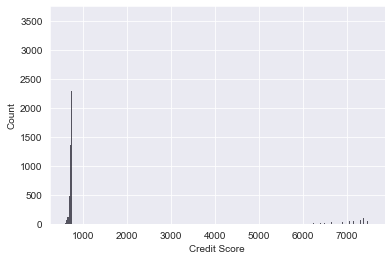

In [17]:
sns.histplot(df['Credit Score'])
plt.show()

In [18]:
df['Credit Score'][df['Credit Score'] > 1000].sort_values()

73449   5850.00
19823   5850.00
1723    5860.00
85342   5890.00
31362   5900.00
          ...  
76476   7510.00
57290   7510.00
83211   7510.00
27919   7510.00
64774   7510.00
Name: Credit Score, Length: 4551, dtype: float64

在[Credit Score]欄位中有4551筆資料多輸入一個0。

In [19]:
df['Credit Score'] = np.where(df['Credit Score'] > 1000,
                               df['Credit Score'] / 10,
                               df['Credit Score'])

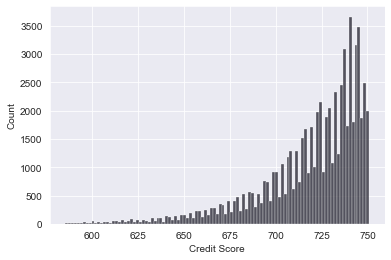

In [20]:
sns.histplot(x = df['Credit Score'])
plt.show()

##### Missing Values

In [21]:
print(df.isnull().sum()[df.isnull().sum()>0])

Credit Score                    14947
Annual Income                   14947
Years in current job             3508
Months since last delinquent    44621
Maximum Open Credit                 2
Bankruptcies                      175
Tax Liens                           8
dtype: int64


[Months since last delinquent]有44621個缺失值，占比極大，故將直接移除此變數。

In [22]:
df.drop(['Months since last delinquent'], axis = 1, inplace = True)
df.isnull().sum()[df.isnull().sum()>0]

Credit Score            14947
Annual Income           14947
Years in current job     3508
Maximum Open Credit         2
Bankruptcies              175
Tax Liens                   8
dtype: int64

In [23]:
df['Credit Score'].groupby(df['Loan Status']).describe()

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17210.00,710.39,31.26,585.00,695.00,719.00,734.00,751.00
Fully Paid,49842.00,722.78,25.92,585.00,712.00,730.00,742.00,751.00


In [24]:
df['Credit Score'] = np.where((df['Credit Score'].isna())&(df['Loan Status']=='Fully Paid'),
                              730,
                              df['Credit Score'])
df['Credit Score'] = np.where((df['Credit Score'].isna())&(df['Loan Status']=='Charged Off'),
                              719,
                              df['Credit Score'])

In [25]:
df['Annual Income'].groupby(df['Loan Status']).describe()

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,17210.00,1267789.54,1506251.10,76627.00,778743.50,1085812.00,1507578.75,165557393.00
Fully Paid,49842.00,1414040.97,937046.24,81092.00,868946.00,1218603.00,1701963.00,36475440.00


In [26]:
df['Annual Income'] = np.where((df['Annual Income'].isna())&(df['Loan Status']=='Fully Paid'),
                                1218603,
                                df['Annual Income'])
df['Annual Income'] = np.where((df['Annual Income'].isna())&(df['Loan Status']=='Charged Off'),
                                1085812,
                                df['Annual Income'])

In [27]:
print(df.isnull().sum()[df.isnull().sum()>0])

Years in current job    3508
Maximum Open Credit        2
Bankruptcies             175
Tax Liens                  8
dtype: int64


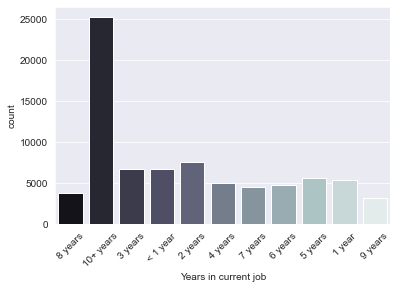

In [28]:
sns.countplot(x = df['Years in current job'], palette='bone')
plt.xticks(rotation = 45)
plt.show()

In [29]:
years_order = ['< 1 year','1 year','2 years','3 years',
               '4 years','5 years','6 years','7 years',
               '8 years','9 years','10+ years']

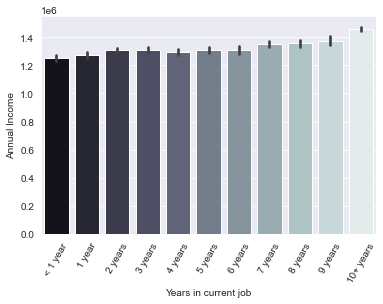

In [30]:
sns.barplot(x = df['Years in current job'], y = df['Annual Income'], order = years_order, palette='bone')
plt.xticks(rotation = 60)
plt.show()

年收入與現職工作年數呈正向關係，將依照年收入來填補工作年數的缺失值。

In [31]:
from sklearn.neighbors import KNeighborsClassifier
imputer = KNeighborsClassifier(n_neighbors=3)

In [32]:
income_notna = df['Annual Income'][df['Years in current job'].notna()]
jobyear_notna = df['Years in current job'][df['Years in current job'].notna()]
income_job_na = df['Annual Income'][df['Years in current job'].isna()]

In [33]:
imputer.fit(np.reshape(np.array(income_notna),(-1,1)), jobyear_notna)

KNeighborsClassifier(n_neighbors=3)

In [34]:
imputed = imputer.predict(np.reshape(np.array(income_job_na),(-1,1)))

In [35]:
for i in range(len(imputed)):
    df['Years in current job'] = df['Years in current job'].fillna(value=imputed[i], limit=1)

In [36]:
df.isnull().sum()[df.isnull().sum()>0]

Maximum Open Credit      2
Bankruptcies           175
Tax Liens                8
dtype: int64

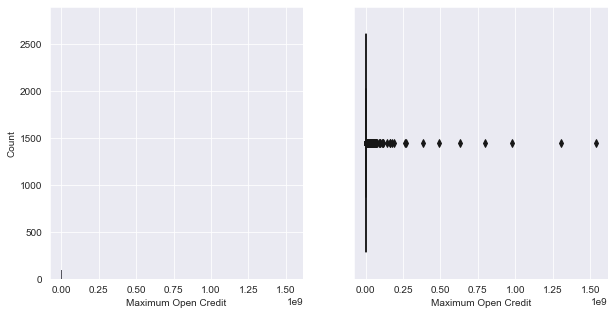

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x = df['Maximum Open Credit'])
plt.subplot(1,2,2)
sns.boxplot(df['Maximum Open Credit'])
plt.show()

In [38]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mode()[0])
df.isnull().sum()[df.isnull().sum()>0]

Bankruptcies    175
Tax Liens         8
dtype: int64

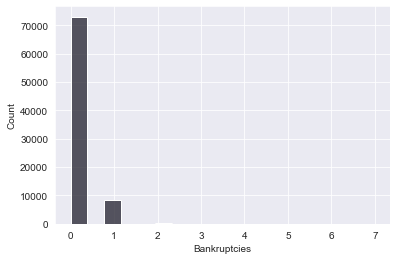

In [39]:
sns.histplot(x = df['Bankruptcies'])
plt.show()

In [40]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
df.isnull().sum()[df.isnull().sum()>0]

Tax Liens    8
dtype: int64

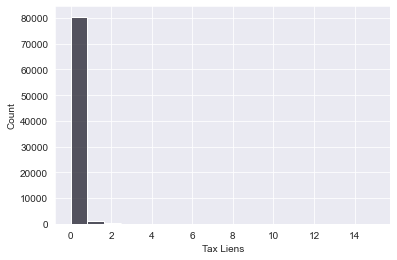

In [41]:
sns.histplot(x = df['Tax Liens'])
plt.show()

In [42]:
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].mode()[0])

In [43]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,81999.00,81999.00,81999.00,81999.00,81999.00,81999.00,81999.00,81999.00,81999.00,81999.00,81999.00
mean,9919200.24,720.77,1338928.82,18330.63,18.30,11.11,0.16,293620.31,793516.46,0.11,0.03
std,29424012.47,25.47,1010088.06,12127.70,7.04,4.98,0.47,372614.51,9208635.94,0.34,0.25
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00
25%,177804.00,713.00,927504.00,10117.60,13.50,8.00,0.00,113316.00,280434.00,0.00,0.00
50%,298518.00,729.00,1218603.00,16075.33,17.00,10.00,0.00,209931.00,477752.00,0.00,0.00
75%,483714.00,738.00,1518936.00,23811.37,21.80,14.00,0.00,366994.50,798479.00,0.00,0.00
max,99999999.00,751.00,165557393.00,435843.28,70.50,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


In [44]:
df.drop(df[df['Current Loan Amount'] == 99999999].index, axis=0,inplace=True)

In [45]:
df.drop(['Loan ID','Customer ID'], axis = 1, inplace = True)

In [46]:
df1 = df.copy()

#### Category features

In [47]:
df1['Loan_01'] = np.where(df1['Loan Status'] == 'Fully Paid', 0, 1)

##### Term

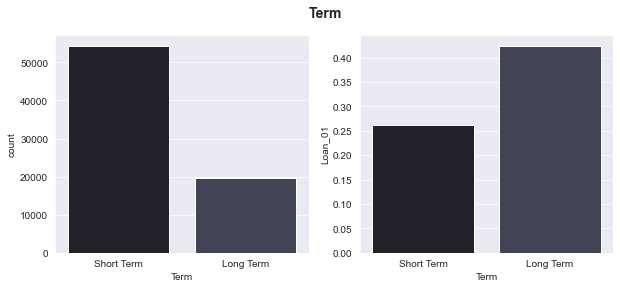

Charging off rate:
Long Term: 0.42
Short Term: 0.26


In [48]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x = df1['Term'])
plt.subplot(1,2,2)
sns.barplot(x=df1['Term'], y=df1['Loan_01'], ci=None)
plt.suptitle('Term', fontsize = 14, weight = 'bold')
plt.show()

print('Charging off rate:')
print('Long Term:',(df1['Term'][(df1['Term'] == 'Long Term')&(df1['Loan Status'] == 'Charged Off')].count() /df1['Term'][df1['Term'] == 'Long Term'].count()).round(2))
print('Short Term:',(df1['Term'][(df1['Term'] == 'Short Term')&(df1['Loan Status'] == 'Charged Off')].count() /df1['Term'][df1['Term'] == 'Short Term'].count()).round(2))

長期貸款有較高的呆帳率。

##### Years in Current Job

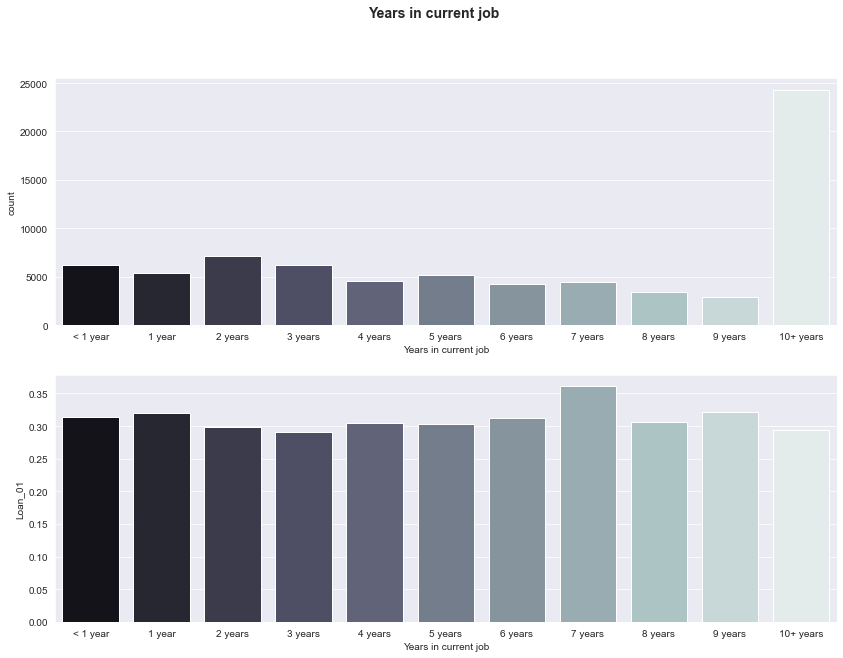

Charging off rate:
< 1 year 0.31
1 year 0.32
2 years 0.3
3 years 0.29
4 years 0.3
5 years 0.3
6 years 0.31
7 years 0.36
8 years 0.31
9 years 0.32
10+ years 0.29


In [49]:
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot(x = df1['Years in current job'], palette='bone', order=years_order)
plt.subplot(212)
sns.barplot(x=df1['Years in current job'], y=df1['Loan_01'], ci=None, palette='bone', order=years_order)
plt.suptitle('Years in current job', fontsize = 14, weight = 'bold')
plt.show()

print('Charging off rate:')
for i in years_order:
    print(str(i),(df1['Years in current job'][(df1['Years in current job'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Years in current job'][df1['Years in current job'] == i].count()).round(2))

現職工作年數為七年的客戶有最高呆帳率，其餘則差距不大。

In [50]:
for i in range(len(years_order)):
    df1['Years in current job'].replace(years_order[i], i, inplace=True)

##### Home Ownership

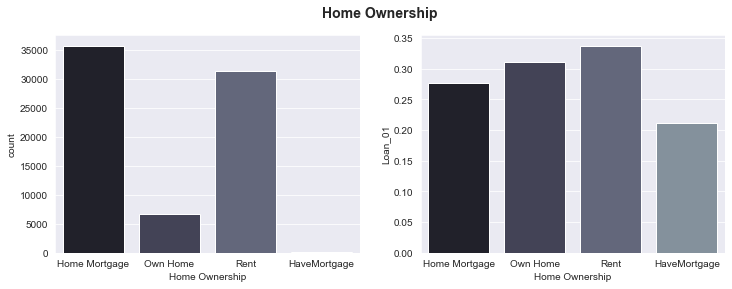

Home Mortgage    35801
Rent             31384
Own Home          6763
HaveMortgage       146
Name: Home Ownership, dtype: int64
Charging off rate:
Home Mortgage : 0.28
Own Home : 0.31
Rent : 0.34
HaveMortgage : 0.21


In [51]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x = df1['Home Ownership'])
plt.subplot(1,2,2)
sns.barplot(x=df1['Home Ownership'], y=df1['Loan_01'], ci=None)
plt.suptitle('Home Ownership', fontsize = 14, weight = 'bold')
plt.show()

print(df1['Home Ownership'].value_counts())
print('Charging off rate:')
for i in df1['Home Ownership'].unique():
    print(str(i),':',(df1['Home Ownership'][(df1['Home Ownership'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Home Ownership'][df1['Home Ownership'] == i].count()).round(2))

租房者有較高呆帳率，有抵押物的客戶最低。

##### Purpose

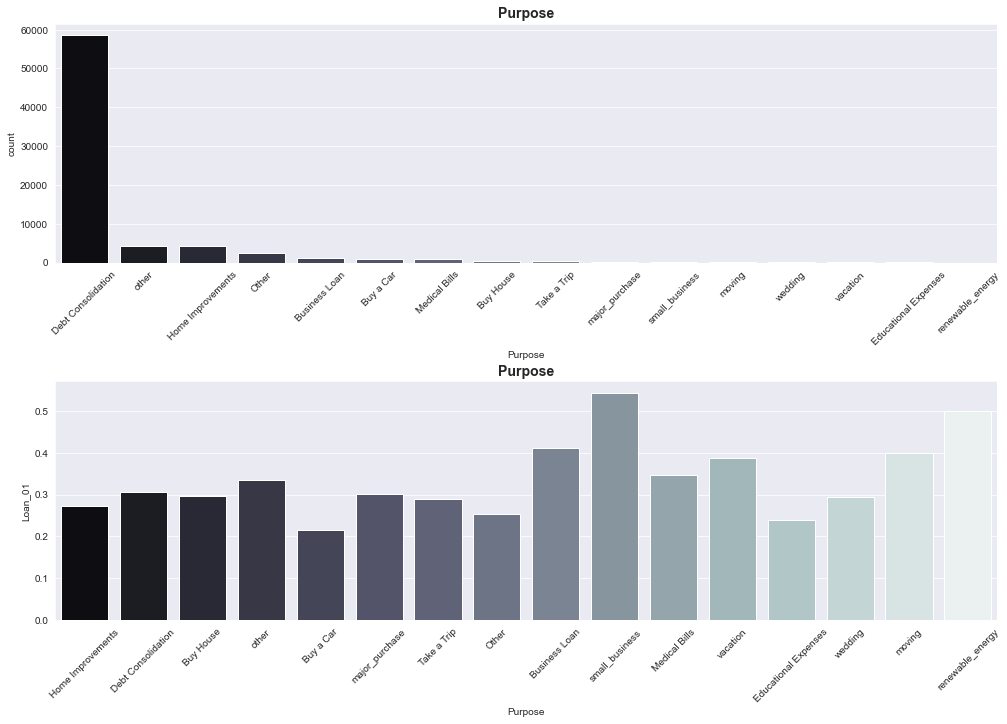

Debt Consolidation      58580
other                    4273
Home Improvements        4267
Other                    2358
Business Loan            1163
Buy a Car                 946
Medical Bills             800
Buy House                 474
Take a Trip               398
major_purchase            272
small_business            219
moving                    108
wedding                    78
vacation                   75
Educational Expenses       75
renewable_energy            8
Name: Purpose, dtype: int64 

Charging off rate:
Home Improvements : 0.27
Debt Consolidation : 0.31
Buy House : 0.3
other : 0.33
Buy a Car : 0.21
major_purchase : 0.3
Take a Trip : 0.29
Other : 0.25
Business Loan : 0.41
small_business : 0.54
Medical Bills : 0.35
vacation : 0.39
Educational Expenses : 0.24
wedding : 0.29
moving : 0.4
renewable_energy : 0.5


In [52]:
pur_order = df1['Purpose'].value_counts().sort_values(ascending=False).index

plt.figure(figsize = (14,10))
plt.subplot(211)
sns.countplot(x = df1['Purpose'],order=pur_order, palette='bone')
plt.title('Purpose', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 45)
plt.subplot(212)
sns.barplot(x=df1['Purpose'], y=df1['Loan_01'], ci=None, palette='bone')
plt.title('Purpose', fontsize = 14, weight = 'bold')
plt.xticks(rotation = 45)
plt.tight_layout(pad=0.5)
plt.show()

print(df1['Purpose'].value_counts(), '\n')
print('Charging off rate:')
for i in df1['Purpose'].unique():
    print(str(i),':',(df1['Purpose'][(df1['Purpose'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Purpose'][df1['Purpose'] == i].count()).round(2))

In [53]:
df1['Purpose'].replace(['other','renewable_energy'], 'Other', inplace=True)

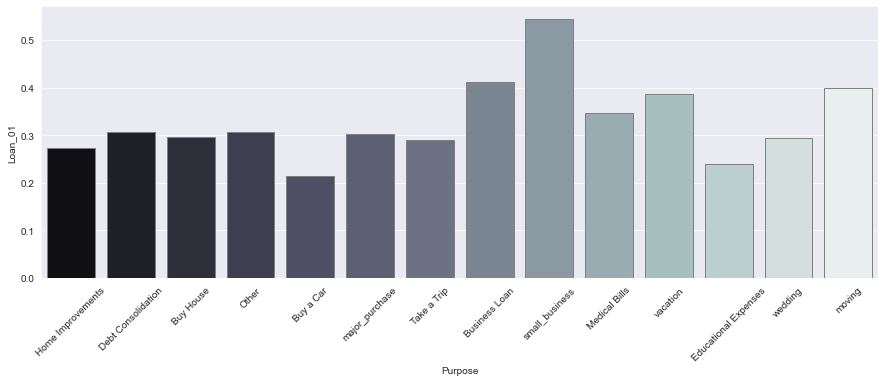

In [54]:
plt.figure(figsize=(15,5))
sns.barplot(x=df1['Purpose'], y=df1['Loan_01'], ci=None, palette='bone', edgecolor='grey')
plt.xticks(rotation=45)
plt.show()

借款用途中呆帳率最高的是小型企業的貸款，高達51%，其次是企業貸款；而呆帳率最低的是車貸與教育支出貸款。

#### Numerical Features

In [55]:
from numpy import median

In [56]:
num_col = df1.dtypes[df1.dtypes == float].index.to_list()
num_col

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

##### Current Loan Amount

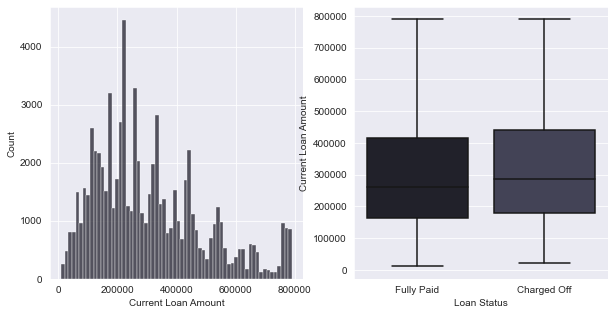

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22639.00,324975.23,185905.92,21450.00,179883.00,286726.00,439835.00,789250.00
Fully Paid,51455.00,301377.79,181463.80,10802.00,161986.00,262152.00,414931.00,789250.00


In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Current Loan Amount'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Current Loan Amount'])
plt.show()
df1['Current Loan Amount'].groupby(df1['Loan Status']).describe()

呆帳客戶的平均當前貸款額較高。

##### Credit Score

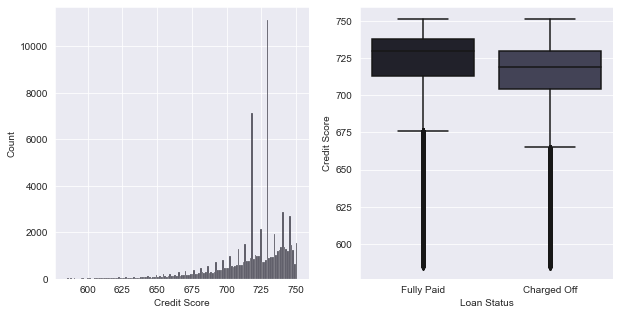

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22639.00,712.46,27.50,585.00,704.00,719.00,730.00,751.00
Fully Paid,51455.00,721.83,24.53,585.00,713.00,730.00,738.00,751.00


In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Credit Score'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Credit Score'])
plt.show()
df1['Credit Score'].groupby(df1['Loan Status']).describe()

呆帳客戶的平均信用評分低於已清償客戶。

##### Annual Income

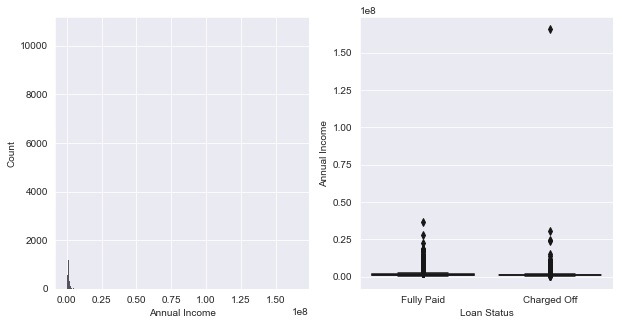

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22639.00,1224149.98,1315573.03,76627.00,873582.00,1085812.00,1342169.50,165557393.00
Fully Paid,51455.00,1375643.62,850248.45,81092.00,946931.50,1218603.00,1553250.00,36475440.00


In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Annual Income'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Annual Income'])
plt.show()
df1['Annual Income'].groupby(df1['Loan Status']).describe()

In [60]:
df1.drop(df1[df1['Annual Income'] > 10000000].index, axis=0, inplace=True)

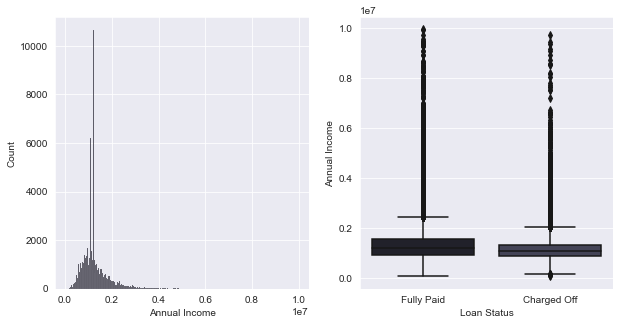

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22628.00,1210279.04,646051.44,76627.00,873463.25,1085812.00,1341290.75,9711850.00
Fully Paid,51415.00,1365316.17,752689.99,81092.00,946732.00,1218603.00,1551540.00,9939280.00


In [61]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Annual Income'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Annual Income'])
plt.show()
df1['Annual Income'].groupby(df1['Loan Status']).describe()

呆帳客戶的平均收入較低。

##### Monthly Debt

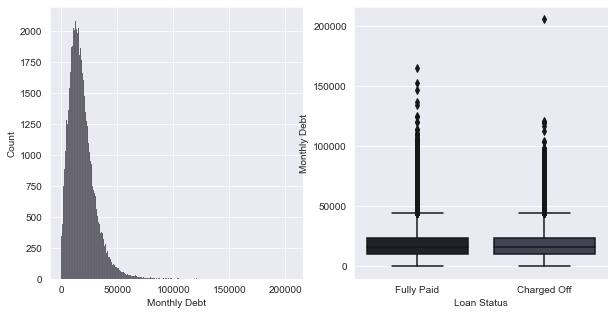

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22628.00,18625.59,11835.63,0.00,10514.55,16453.72,24037.94,205801.35
Fully Paid,51415.00,18243.56,11988.02,0.00,9999.89,15996.86,23802.15,165437.18


In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Monthly Debt'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Monthly Debt'])
plt.show()
df1['Monthly Debt'].groupby(df1['Loan Status']).describe()

In [63]:
df1.drop(df1[df1['Monthly Debt'] > 150000].index, axis=0, inplace=True)

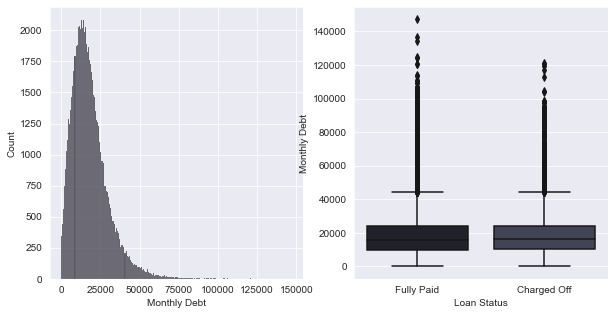

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22627.00,18617.31,11770.29,0.00,10514.32,16453.43,24037.00,121140.58
Fully Paid,51413.00,18238.08,11956.00,0.00,9999.70,15996.67,23801.87,147152.53


In [64]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Monthly Debt'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Monthly Debt'])
plt.show()
df1['Monthly Debt'].groupby(df1['Loan Status']).describe()

呆帳客戶的每月債務較高。

##### Years of Credit History

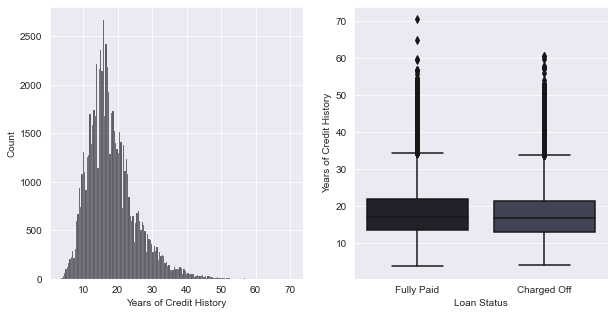

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22627.00,17.89,7.09,4.10,13.00,16.60,21.30,60.50
Fully Paid,51413.00,18.37,6.99,3.60,13.60,17.00,21.90,70.50


In [65]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Years of Credit History'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Years of Credit History'])
plt.show()
df1['Years of Credit History'].groupby(df1['Loan Status']).describe()

信用紀錄年數與呆帳之間沒有顯著關係。

##### Number of Open Accounts

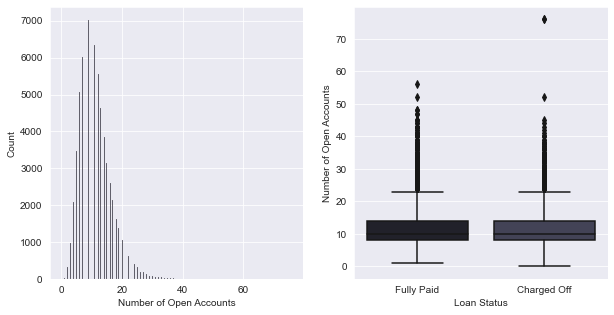

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22627.00,11.24,5.05,0.00,8.00,10.00,14.00,76.00
Fully Paid,51413.00,11.06,4.96,1.00,8.00,10.00,14.00,56.00


In [66]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Number of Open Accounts'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Number of Open Accounts'])
plt.show()
df1['Number of Open Accounts'].groupby(df1['Loan Status']).describe()

戶頭數與呆帳間無顯著關係。

##### Number of Credit Problems

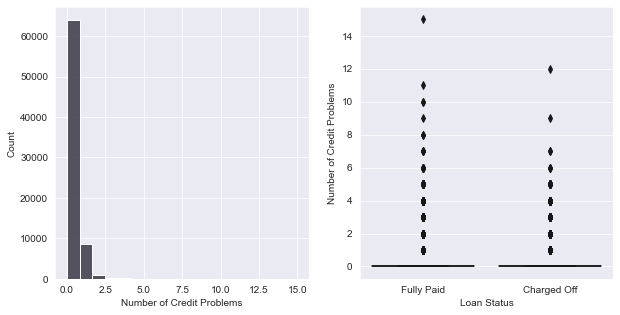

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22627.00,0.17,0.49,0.00,0.00,0.00,0.00,12.00
Fully Paid,51413.00,0.16,0.47,0.00,0.00,0.00,0.00,15.00


0.00     63983
1.00      8710
2.00       927
3.00       266
4.00        90
5.00        38
6.00        11
7.00         6
10.00        2
8.00         2
9.00         2
11.00        1
15.00        1
12.00        1
Name: Number of Credit Problems, dtype: int64


In [67]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Number of Credit Problems'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Number of Credit Problems'])
plt.show()
display(df1['Number of Credit Problems'].groupby(df1['Loan Status']).describe())
print(df1['Number of Credit Problems'].value_counts())

In [68]:
print('Charging off rate:')
for i in df1['Number of Credit Problems'].unique():
    print(str(i),':',(df1['Number of Credit Problems'][(df1['Number of Credit Problems'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Number of Credit Problems'][df1['Number of Credit Problems'] == i].count()).round(2))

Charging off rate:
1.0 : 0.31
0.0 : 0.3
2.0 : 0.33
5.0 : 0.45
4.0 : 0.39
7.0 : 0.33
6.0 : 0.27
3.0 : 0.32
11.0 : 0.0
15.0 : 0.0
10.0 : 0.0
8.0 : 0.0
9.0 : 0.5
12.0 : 1.0


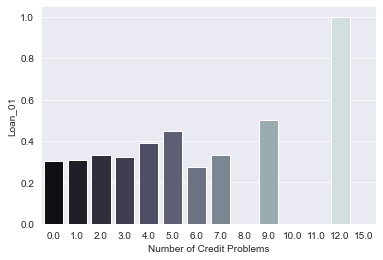

In [69]:
sns.barplot(x=df1['Number of Credit Problems'], y=df1['Loan_01'], ci=None, palette='bone')
plt.show()

信用問題個數與呆帳率大致上成正比，但5之後因樣本數過少而不符規律，故將移除大於5之樣本。

In [70]:
df1.drop(df1[df1['Number of Credit Problems'] >= 6].index, axis=0, inplace=True)

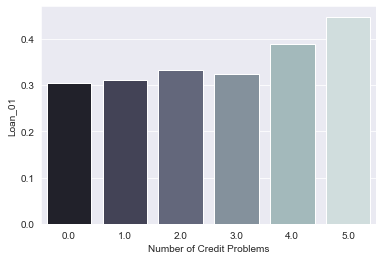

In [71]:
sns.barplot(x=df1['Number of Credit Problems'], y=df1['Loan_01'], ci=None)
plt.show()

##### Current Credit Balance

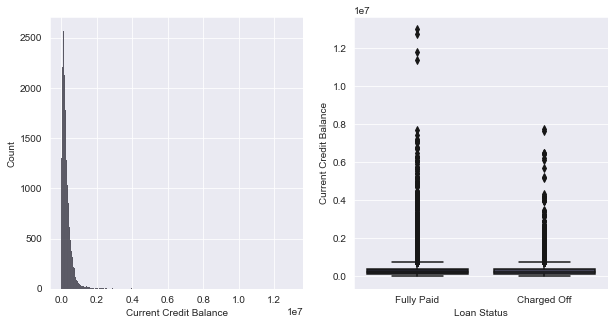

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22620.00,286364.68,306669.16,0.00,117819.00,213978.00,366932.75,7749587.00
Fully Paid,51394.00,294600.02,363157.09,0.00,111435.00,208107.00,366638.25,12986956.00


In [72]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Current Credit Balance'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Current Credit Balance'])
plt.show()
display(df1['Current Credit Balance'].groupby(df1['Loan Status']).describe())

In [73]:
df1.drop(df1[df1['Current Credit Balance'] > 10000000].index, axis=0, inplace=True)

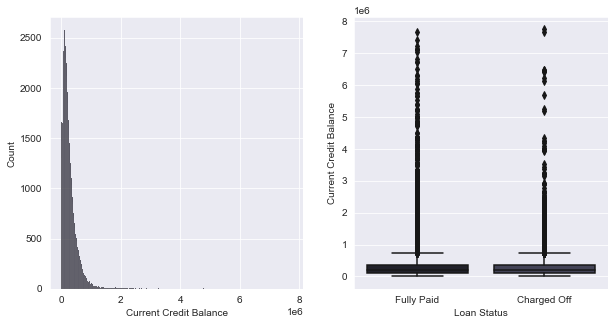

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22620.00,286364.68,306669.16,0.00,117819.00,213978.00,366932.75,7749587.00
Fully Paid,51390.00,293671.56,347538.03,0.00,111420.75,208088.00,366600.25,7679344.00


In [74]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Current Credit Balance'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Current Credit Balance'])
plt.show()
display(df1['Current Credit Balance'].groupby(df1['Loan Status']).describe())

呆帳客戶的平均(中位數)信用餘額較高。

##### Maximum Open Credit

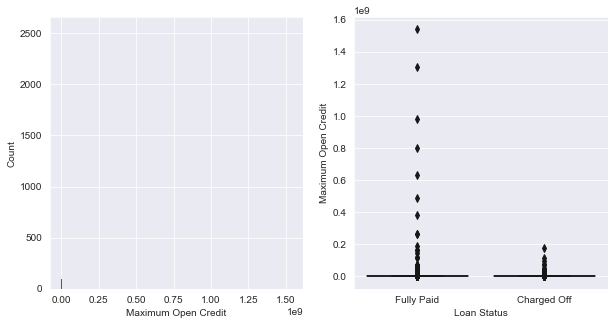

,count,mean,std,min,25%,50%,75%,max
Loan Status,,,,,,,,
Charged Off,22620.00,625924.76,1915572.34,0.00,263961.50,443322.00,726412.50,175043572.00
Fully Paid,51390.00,861878.00,11528308.24,0.00,283431.50,486123.00,818350.50,1539737892.00


In [75]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Maximum Open Credit'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Maximum Open Credit'])
plt.show()
df1['Maximum Open Credit'].groupby(df1['Loan Status']).describe()

呆帳客戶的最大無擔保信貸較低。

##### Bankruptcies

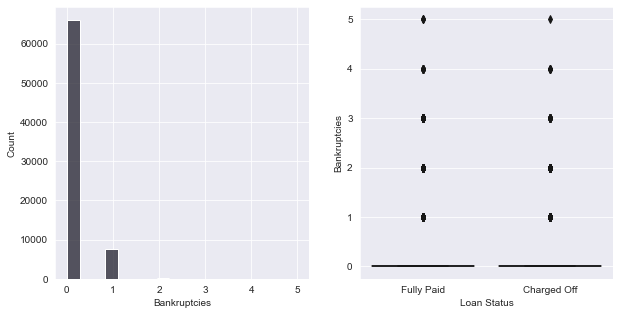

0.00    66088
1.00     7545
2.00      291
3.00       65
4.00       17
5.00        4
Name: Bankruptcies, dtype: int64
Charging off rate:
1.0 : 0.3
0.0 : 0.31
2.0 : 0.32
4.0 : 0.35
3.0 : 0.28
5.0 : 0.25


In [76]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Bankruptcies'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Bankruptcies'])
plt.show()
print(df1['Bankruptcies'].value_counts())
print('Charging off rate:')
for i in df1['Bankruptcies'].unique():
    print(str(i),':',(df1['Bankruptcies'][(df1['Bankruptcies'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Bankruptcies'][df1['Bankruptcies'] == i].count()).round(2))

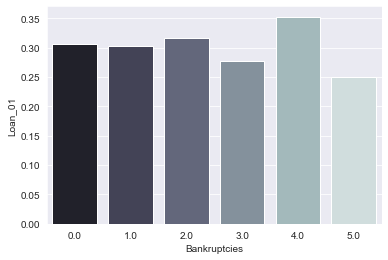

In [77]:
sns.barplot(x=df1['Bankruptcies'], y=df1['Loan_01'], ci=None, palette='bone')
plt.show()

破產次數與呆帳率無顯著關聯，4、5因樣本數過少較無參考價值。

In [78]:
df1.drop(df1[df1['Bankruptcies'] > 3].index, axis=0, inplace=True)

##### Tax Liens

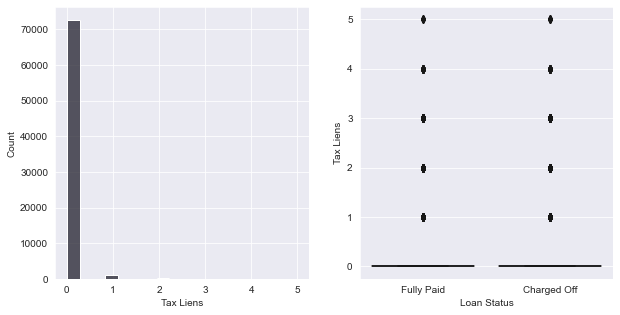

0.00    72625
1.00      964
2.00      263
3.00       84
4.00       42
5.00       11
Name: Tax Liens, dtype: int64
Charging off rate:
0.0 : 0.3
1.0 : 0.34
2.0 : 0.34
4.0 : 0.5
3.0 : 0.43
5.0 : 0.55


In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(df1['Tax Liens'])
plt.subplot(1,2,2)
sns.boxplot(x = df1['Loan Status'], y = df1['Tax Liens'])
plt.show()
print(df1['Tax Liens'].value_counts())
print('Charging off rate:')
for i in df1['Tax Liens'].unique():
    print(str(i),':',(df1['Tax Liens'][(df1['Tax Liens'] == i)&(df1['Loan Status'] == 'Charged Off')].count() / 
                  df1['Tax Liens'][df1['Tax Liens'] == i].count()).round(2))

In [80]:
df1.drop(df1[df1['Tax Liens'] > 5].index, axis=0, inplace=True)

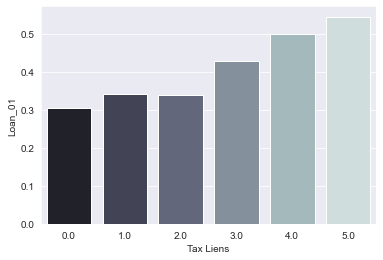

In [81]:
sns.barplot(x=df1['Tax Liens'], y=df1['Loan_01'], ci=None)
plt.show()

呆帳率與欠稅問題成正比。

In [82]:
df2 = df1.copy()

#### Outlier

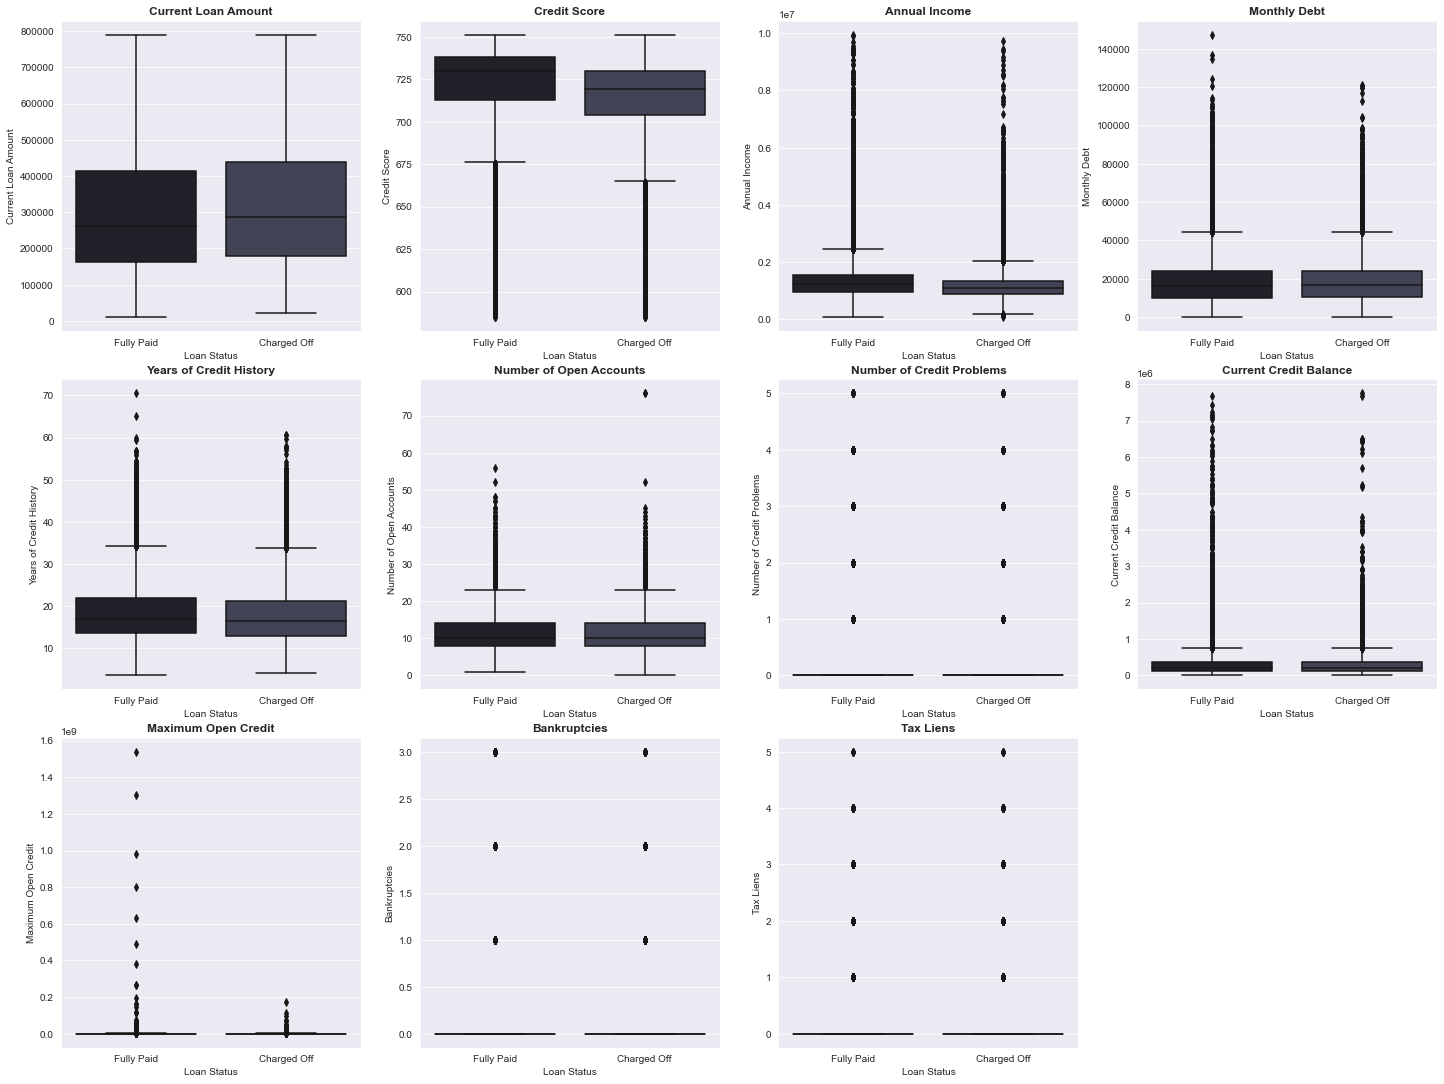

In [83]:
plt.figure(figsize=(20,15))
for i in range(len(num_col)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=df2['Loan Status'], y=df2[num_col[i]])
    plt.title(num_col[i], weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

In [84]:
out_col = ['Credit Score','Annual Income','Monthly Debt',
           'Years of Credit History','Number of Open Accounts',
           'Current Credit Balance','Maximum Open Credit']

In [85]:
def remove_outlier(data,target,feat,value):
    n = 1.5
    IQR = data[feat].groupby(data[target]).quantile(.75) - data[feat].groupby(data[target]).quantile(.25)
    upper = (data[feat].groupby(data[target]).quantile(.75) + n * IQR)[value]
    lower = (data[feat].groupby(data[target]).quantile(.25) - n * IQR)[value]
    
    data = data.drop(data[(data[target] == value)&(data[feat] > upper)].index, axis=0)
    data = data.drop(data[(data[target] == value)&(data[feat] < lower)].index, axis=0)
    
    return data

In [86]:
for i in out_col:
    for j in df2['Loan Status'].unique():
        df2 = remove_outlier(df2, 'Loan Status', i, j)

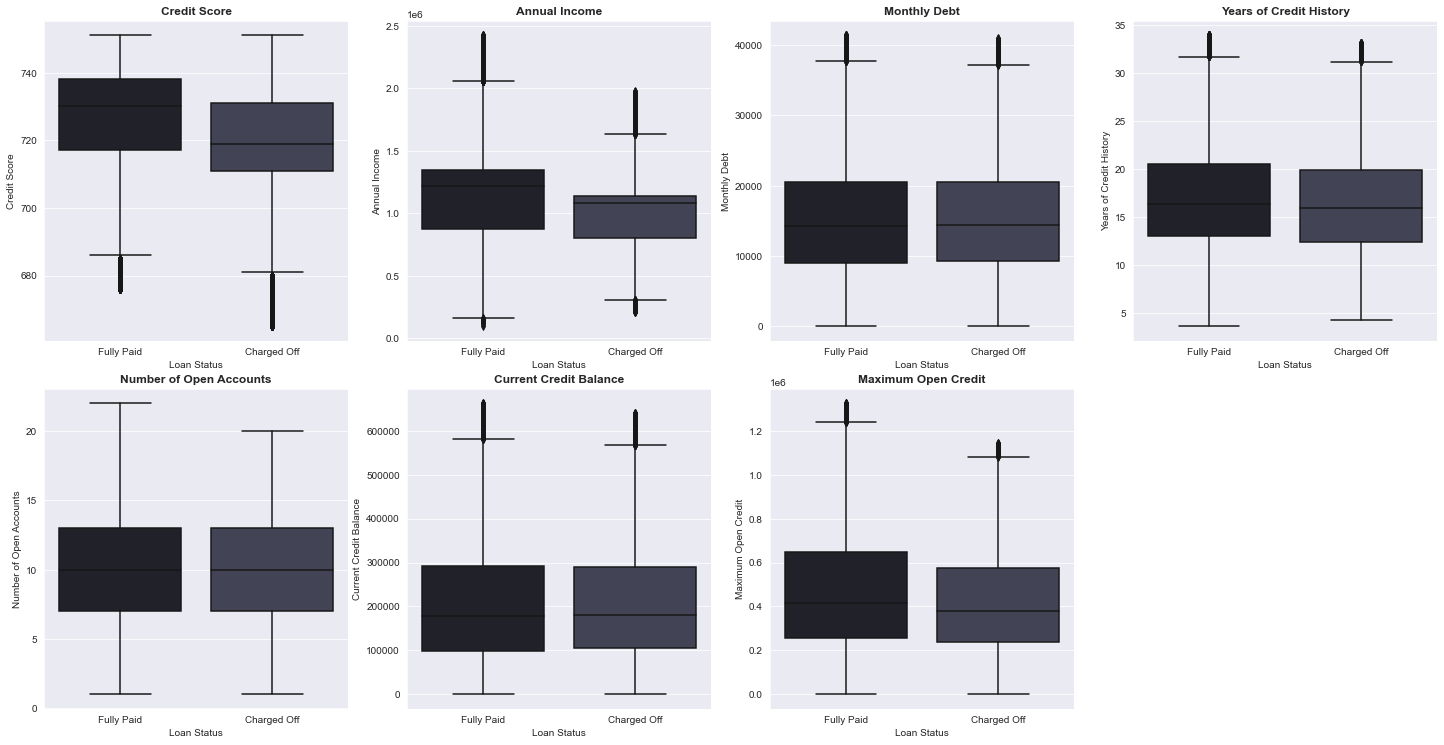

In [87]:
plt.figure(figsize=(20,15))
for i in range(len(out_col)):
    plt.subplot(3,4,i+1)
    sns.boxplot(x=df2['Loan Status'], y=df2[out_col[i]])
    plt.title(out_col[i], weight='bold')
plt.tight_layout(pad=0.5)
plt.show()

In [88]:
df2.describe()

,Current Loan Amount,Credit Score,Annual Income,Years in current job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_01
count,54133.00,54133.00,54133.00,54133.00,54133.00,54133.00,54133.00,54133.00,54133.00,54133.00,54133.00,54133.00,54133.00
mean,270373.82,723.47,1128051.90,5.73,15322.94,16.92,10.14,0.17,209360.16,459023.27,0.13,0.02,0.30
std,156121.32,17.53,395547.54,3.62,8338.66,5.76,3.99,0.46,142496.71,273980.06,0.35,0.21,0.46
min,10802.00,665.00,97033.00,0.00,0.00,3.60,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,153362.00,715.00,856463.00,2.00,9106.89,12.80,7.00,0.00,100738.00,248270.00,0.00,0.00,0.00
50%,234256.00,728.00,1111614.00,6.00,14279.07,16.20,10.00,0.00,178809.00,405328.00,0.00,0.00,0.00
75%,355278.00,736.00,1289682.00,10.00,20475.35,20.40,13.00,0.00,291631.00,624954.00,0.00,0.00,1.00
max,789250.00,751.00,2424400.00,10.00,41361.48,33.90,22.00,5.00,662302.00,1324796.00,3.00,5.00,1.00


In [89]:
df2.drop(['Loan_01'], axis=1, inplace=True)

In [90]:
df3 = df2.copy()

#### Convert Category Features into Dummy Variables

In [91]:
df3.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.00,Short Term,709.00,1167493.00,8,Home Mortgage,Home Improvements,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00
3,Fully Paid,347666.00,Long Term,721.00,806949.00,3,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00
5,Charged Off,206602.00,Short Term,729.00,896857.00,10,Home Mortgage,Debt Consolidation,16367.74,17.30,6.00,0.00,215308.00,272448.00,0.00,0.00
6,Fully Paid,217646.00,Short Term,730.00,1184194.00,0,Home Mortgage,Debt Consolidation,10855.08,19.60,13.00,1.00,122170.00,272052.00,1.00,0.00
7,Charged Off,648714.00,Long Term,719.00,1085812.00,0,Home Mortgage,Buy House,14806.13,8.20,15.00,0.00,193306.00,864204.00,0.00,0.00


In [92]:
df3['Loan Status'] = np.where(df3['Loan Status']=='Charged Off', 1, 0)
df3.rename(columns={'Loan Status':'Charged Off'}, inplace=True)

In [93]:
df3.dtypes

Charged Off                    int32
Current Loan Amount          float64
Term                          object
Credit Score                 float64
Annual Income                float64
Years in current job           int64
Home Ownership                object
Purpose                       object
Monthly Debt                 float64
Years of Credit History      float64
Number of Open Accounts      float64
Number of Credit Problems    float64
Current Credit Balance       float64
Maximum Open Credit          float64
Bankruptcies                 float64
Tax Liens                    float64
dtype: object

In [94]:
df3[['Years in current job','Number of Credit Problems','Bankruptcies','Tax Liens']] = df3[['Years in current job','Number of Credit Problems','Bankruptcies','Tax Liens']].astype('int32')
df3[['Years in current job','Number of Credit Problems','Bankruptcies','Tax Liens']] = df3[['Years in current job','Number of Credit Problems','Bankruptcies','Tax Liens']].astype('str')

In [95]:
df3 = pd.get_dummies(df3)
df3

,Charged Off,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Term_Long Term,Term_Short Term,Years in current job_0,Years in current job_1,Years in current job_10,Years in current job_2,Years in current job_3,Years in current job_4,Years in current job_5,Years in current job_6,Years in current job_7,Years in current job_8,Years in current job_9,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_small_business,Purpose_vacation,Purpose_wedding,Number of Credit Problems_0,Number of Credit Problems_1,Number of Credit Problems_2,Number of Credit Problems_3,Number of Credit Problems_4,Number of Credit Problems_5,Bankruptcies_0,Bankruptcies_1,Bankruptcies_2,Bankruptcies_3,Tax Liens_0,Tax Liens_1,Tax Liens_2,Tax Liens_3,Tax Liens_4,Tax Liens_5
0,0,445412.00,709.00,1167493.00,5214.74,17.20,6.00,228190.00,416746.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,347666.00,721.00,806949.00,8741.90,12.00,9.00,256329.00,386958.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,1,206602.00,729.00,896857.00,16367.74,17.30,6.00,215308.00,272448.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,0,217646.00,730.00,1184194.00,10855.08,19.60,13.00,122170.00,272052.00,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,1,648714.00,719.00,1085812.00,14806.13,8.20,15.00,193306.00,864204.00,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,1,309474.00,719.00,1085812.00,13817.18,26.90,15.00,225872.00,892606.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99989,1,429132.00,719.00,1085812.00,28948.02,16.30,16.00,485279.00,656414.00,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99994,0,210584.00,719.00,783389.00,3727.61,17.40,6.00,456.00,259160.00,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99997,0,103136.00,742.00,1150545.00,7315.57,18.80,12.00,109554.00,537548.00,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [97]:
df3.drop(['Term_Short Term','Home Ownership_Home Mortgage','Purpose_Debt Consolidation',
          'Tax Liens_0','Bankruptcies_0','Years in current job_10','Number of Credit Problems_0'],
         axis=1,
         inplace=True)

#### VIF

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [99]:
features = df3.drop(['Charged Off'], axis = 1).columns.to_list()

In [100]:
def VIF(variables, data):
    x = data[variables]
    x = add_constant(x)
    vif = pd.DataFrame()
    vif['features'] = x.columns
        
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    vif = vif[vif['features']!='const']
    return vif

In [101]:
VIF(features, df3).sort_values('VIF', ascending=False)

,features,VIF
36,Number of Credit Problems_1,6.53
41,Bankruptcies_1,6.30
37,Number of Credit Problems_2,2.50
8,Maximum Open Credit,2.48
38,Number of Credit Problems_3,2.47
7,Current Credit Balance,2.43
40,Number of Credit Problems_5,2.19
47,Tax Liens_4,1.88
42,Bankruptcies_2,1.76
39,Number of Credit Problems_4,1.74


所有自變數的膨脹係數皆未高於10，故無須刪除。

#### Modeling

In [102]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score as cv
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [103]:
X = df3.drop('Charged Off', axis = 1)
y = df3['Charged Off']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [105]:
print('X_train :', X_train.shape[0])
print('X_test :', X_test.shape[0])
print('y_train :', y_train.shape[0])
print('y_test :', X_test.shape[0])

X_train : 37893
X_test : 16240
y_train : 37893
y_test : 16240


In [106]:
scaler = StandardScaler() 

In [107]:
scaled_col = ['Current Loan Amount', 'Credit Score','Annual Income', 'Monthly Debt', 
              'Years of Credit History','Number of Open Accounts','Current Credit Balance','Maximum Open Credit']

In [108]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [109]:
X_train_scaled = np.hstack((scaler.fit_transform(X_train[scaled_col]),np.array(X_train.drop(scaled_col, axis = 1))))
X_test_scaled = np.hstack((scaler.fit_transform(X_test[scaled_col]),np.array(X_test.drop(scaled_col, axis = 1))))

In [110]:
X_train_scaled_res, y_train_scaled_res = SMOTE().fit_resample(X_train_scaled, y_train)

In [111]:
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)

In [112]:
print(y_train_res.value_counts())

0    26691
1    26691
Name: Charged Off, dtype: int64


In [113]:
log_reg = LogisticRegression()
log_reg_score = cv(log_reg, X_train_scaled, y_train, cv=5, n_jobs=-1)
log_reg_mean = log_reg_score.mean()

log_reg_res_score = cv(log_reg, X_train_scaled_res, y_train_scaled_res, cv=5, n_jobs=-1)
log_reg_res_mean = log_reg_res_score.mean()

svc = SVC()
svc_score = cv(svc, X_train_scaled, y_train, cv=5, n_jobs=-1)
svc_mean = svc_score.mean()

svc_res_score = cv(svc, X_train_scaled_res, y_train_scaled_res, cv=5, n_jobs=-1)
svc_res_mean = svc_res_score.mean()

rf = RandomForestClassifier()
rf_score = cv(rf, X_train, y_train, cv=5, n_jobs=-1)
rf_mean = rf_score.mean()

rf_res_score = cv(rf, X_train_res, y_train_res, cv=5, n_jobs=-1)
rf_res_mean = rf_res_score.mean()

gb = GradientBoostingClassifier()
gb_score = cv(gb, X_train, y_train, cv=5, n_jobs=-1)
gb_mean = gb_score.mean()

gb_res_score = cv(gb, X_train_res, y_train_res, cv=5, n_jobs=-1)
gb_res_mean = gb_res_score.mean()

result = ({'Model':['Logistic Regression','Logistic Regression SMOTE',
                    'SVC','SVC SMOTE',
                    'Random Forest','Random Forest SMOTE',
                    'Gradient Boosting','Gradient Boosting SMOTE'],
           'Mean Score':[log_reg_mean, log_reg_res_mean, svc_mean, svc_res_mean,
                         rf_mean, rf_res_mean, gb_mean, gb_res_mean]})
train_score = pd.DataFrame(result)

In [114]:
train_score.sort_values('Mean Score', ascending=False)

,Model,Mean Score
5,Random Forest SMOTE,0.81
6,Gradient Boosting,0.79
4,Random Forest,0.79
7,Gradient Boosting SMOTE,0.77
2,SVC,0.72
3,SVC SMOTE,0.72
0,Logistic Regression,0.71
1,Logistic Regression SMOTE,0.64


使用過採樣數據的隨機森林模型表現最佳。

In [115]:
rf_param = {'n_estimators':[100,150,200,250],
            'max_depth':[None,10,20,30],
            'max_features':['sqrt'],
            'max_samples':[0.68,0.8]}
rf_gscv = GridSearchCV(rf, rf_param, cv=5, n_jobs=-1)

In [116]:
rf_gscv.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt'], 'max_samples': [0.68, 0.8],
                         'n_estimators': [100, 150, 200, 250]})

In [117]:
rf_gscv.best_estimator_

RandomForestClassifier(max_features='sqrt', max_samples=0.8, n_estimators=200)

In [120]:
RF_model = RandomForestClassifier(n_estimators=200,
                                  max_depth=None,
                                  max_features='sqrt',
                                  max_samples=0.8,
                                  random_state=42,
                                  n_jobs=-1)
RF_model.fit(X_train_res, y_train_res)
y_pred = RF_model.predict(X_test)
print('Train Score:', RF_model.score(X_train_res, y_train_res))
print('Test Score:', metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Score: 0.9999812670937769
Test Score: 0.7548029556650246
              precision    recall  f1-score   support

           0       0.80      0.88      0.83     11425
           1       0.61      0.47      0.53      4815

    accuracy                           0.75     16240
   macro avg       0.70      0.67      0.68     16240
weighted avg       0.74      0.75      0.74     16240



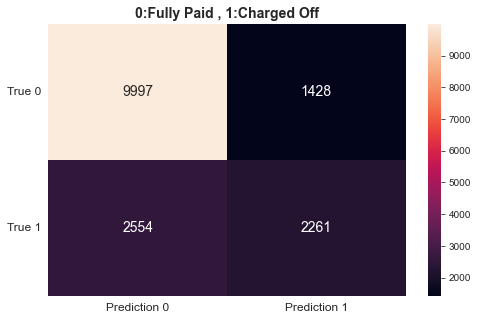

In [121]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            annot_kws={'size':14},
            fmt='d',
            xticklabels=['Prediction 0', 'Prediction 1'],
            yticklabels=['True 0', 'True 1'])
plt.title('0:Fully Paid , 1:Charged Off', fontsize=14, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=360)
plt.show()

此模型的準確度僅75%，在測試集中的4815個呆帳客戶僅有2261位被成功辨認出(約47%)，原因可由先前之分析看出，此數據有大部分變數與客戶呆帳率之間並無顯著相關，造成模型對於目標變數的辨認能力有限，若要加強此模型的準確度則需再多納入其他解釋變數。